import libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

read the file

In [42]:
data=pd.read_csv('/content/drive/MyDrive/corona dataset/supermarket_sales - Sheet1.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


drop Invoice ID	because not necessary

In [43]:
data.drop('Invoice ID',axis=1,inplace=True)
data.drop(['Date','Time'],axis=1,inplace=True)

see dataset info

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(1), 


statical information

In [45]:
data.describe(include='all')

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,3,3,2,2,6,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,Ewallet,NaN,NaN,NaN,NaN
freq,340,340,501,501,178,NaN,NaN,NaN,NaN,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,448.90500,4.761905,22.445250,8.50000


check null values

In [46]:
data.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

no null value

check duplicate

In [47]:
data.duplicated().sum()

0

no duplicate value


don't repeat your self

In [48]:
cat=data.select_dtypes(include=['object']).columns
num=data.select_dtypes(include=['int','float']).columns

In [49]:
for i in cat:
  print("feature name :"+i)                  #columns name
  print(data[i].unique())   #input values in each categories columns
  print(data[i].nunique())  #number of different values in each categorical columns

feature name :Branch
['A' 'C' 'B']
3
feature name :City
['Yangon' 'Naypyitaw' 'Mandalay']
3
feature name :Customer type
['Member' 'Normal']
2
feature name :Gender
['Female' 'Male']
2
feature name :Product line
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
6
feature name :Payment
['Ewallet' 'Cash' 'Credit card']
3


In [50]:
for i in cat:
    print(data[i].value_counts()) # number of times it was entered

A    340
B    332
C    328
Name: Branch, dtype: int64
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
Member    501
Normal    499
Name: Customer type, dtype: int64
Female    501
Male      499
Name: Gender, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


In [51]:
#all branches sold items nearly but branch A sold the most
#all city active good but Yangon is the best
#501 customer always back
#501 male and 401 female who bought from us
#the customers like Fashion accessories
#most payment method ewallet but all methods are close

top rating

In [52]:
data[data['Rating']==data['Rating'].max()]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
60,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,Credit card,74.22,4.761905,3.7110,10.0
62,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,Ewallet,495.63,4.761905,24.7815,10.0
159,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,Ewallet,560.34,4.761905,28.0170,10.0
387,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,Credit card,323.20,4.761905,16.1600,10.0
853,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,Ewallet,527.90,4.761905,26.3950,10.0


target=gross income

deal with outlier


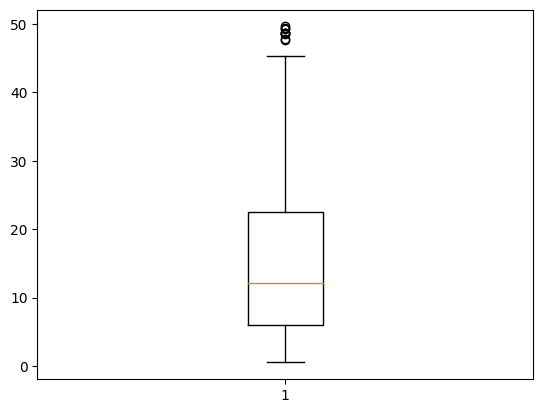

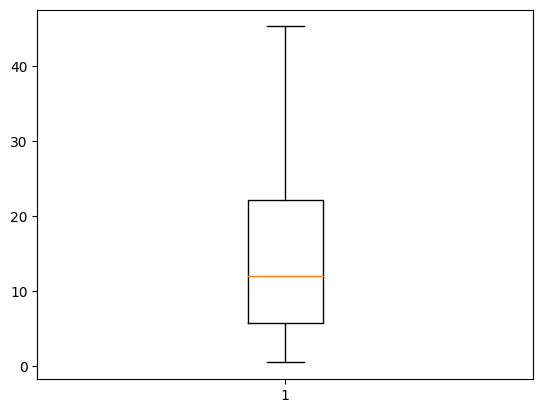

In [53]:
plt.boxplot(data['gross income'])
plt.show()
outlier=data['gross income'].quantile(0.99)
data=data[data['gross income']<outlier]
plt.boxplot(data['gross income'])
plt.show()

In [54]:

def plot (data):

  corr=data.corr()
  sns.heatmap(corr,annot=True,cmap="BuPu",center=0)
  plt.title("heatmap")
  plt.show()

  for i in num:
    outlier=data[i].quantile(0.9)
    data=data[data[i]<outlier]
    plt.boxplot(data[i])
    plt.show()


  for i in data:
    plt.figure(figsize=(10,10))
    plt.hist(data[i],bins=30,edgecolor='black')
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.title(f'histogram of {i}')
    plt.show()

  for i in data:
    plt.figure(figsize=(10,10))
    plt.plot(data[i],data['gross income'])
    plt.xlabel(i)
    plt.ylabel("gross income")
    plt.title(f'plot of {i}')
    plt.show()

  for i in data:
    plt.figure(figsize=(10,10))
    plt.scatter(data[i],data['gross income'])
    plt.xlabel(i)
    plt.ylabel("gross income")
    plt.title(f'scatter of {i}')
    plt.show()

<ipython-input-55-880c54873504>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


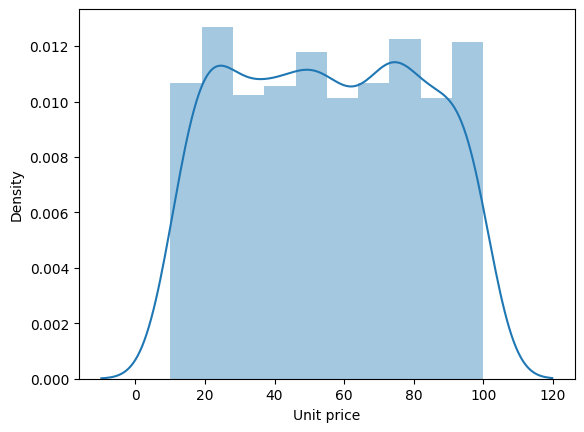

<ipython-input-55-880c54873504>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


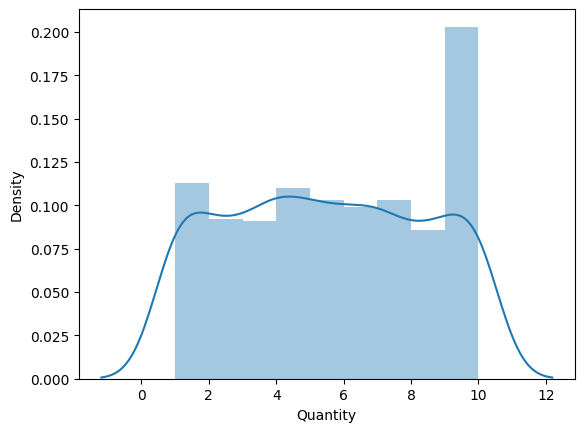

<ipython-input-55-880c54873504>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


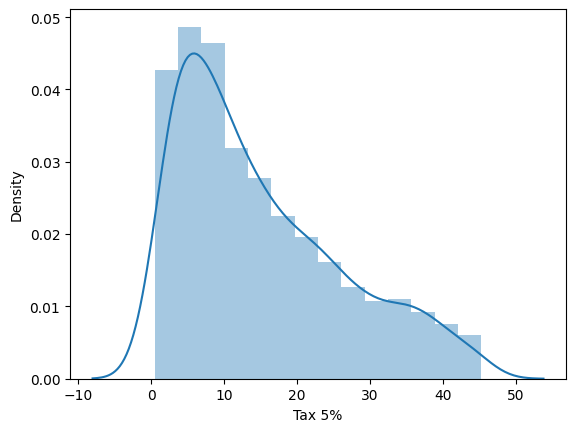

<ipython-input-55-880c54873504>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


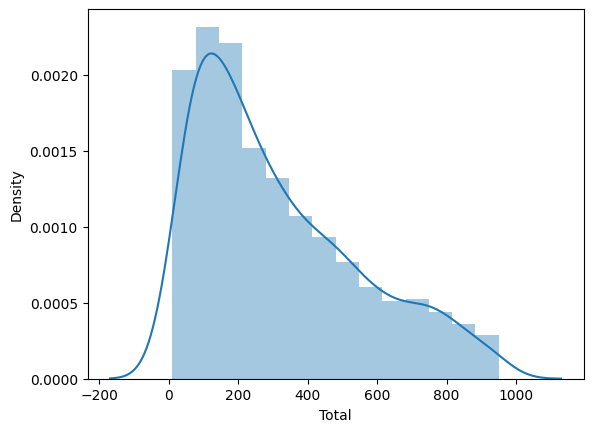

<ipython-input-55-880c54873504>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


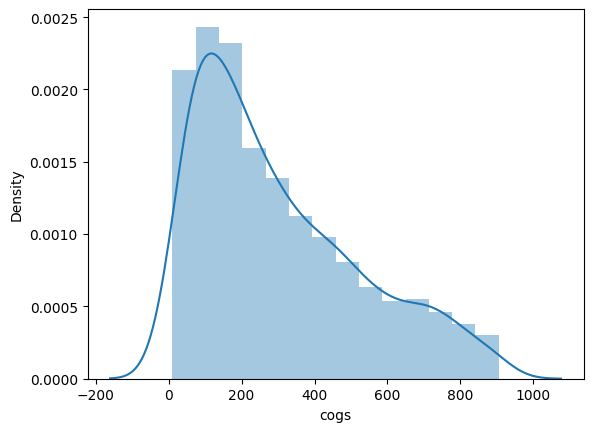

<ipython-input-55-880c54873504>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


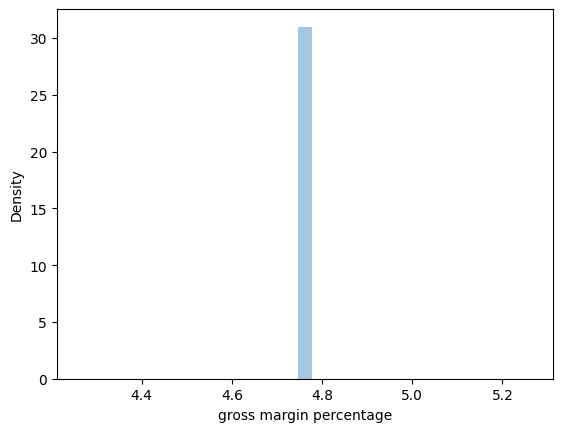

<ipython-input-55-880c54873504>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


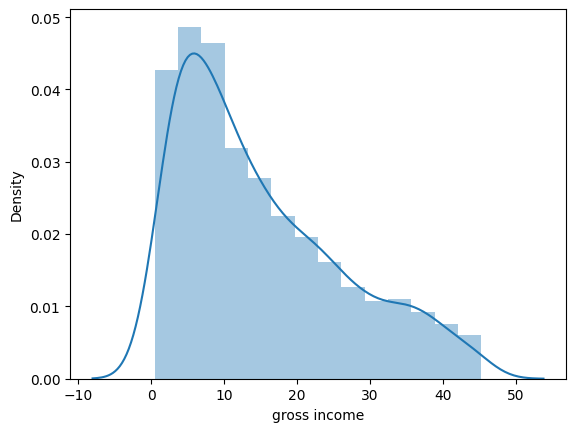

<ipython-input-55-880c54873504>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


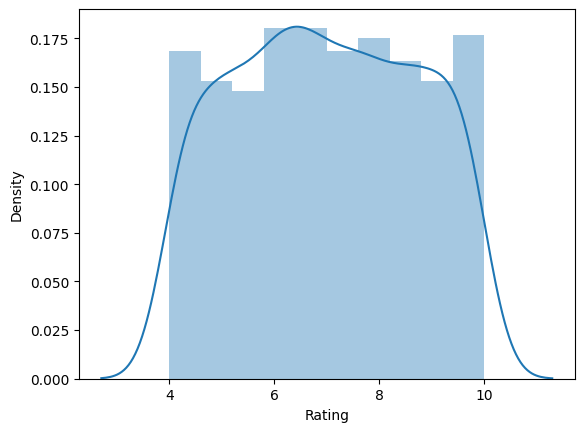

In [55]:
for i in num:
  sns.distplot(data[i])
  plt.show()

log numerical features to make it linear

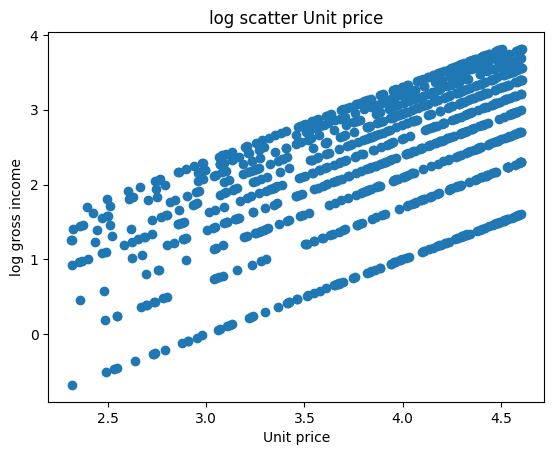

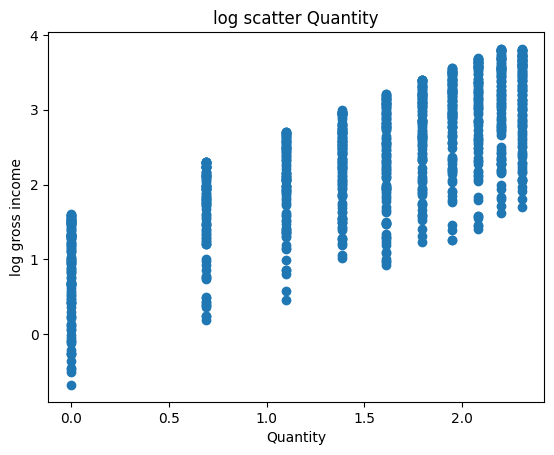

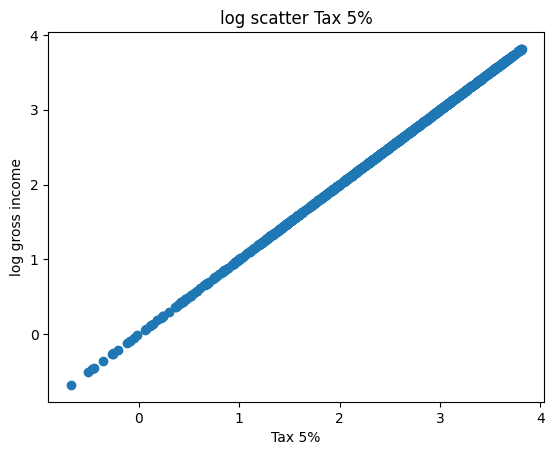

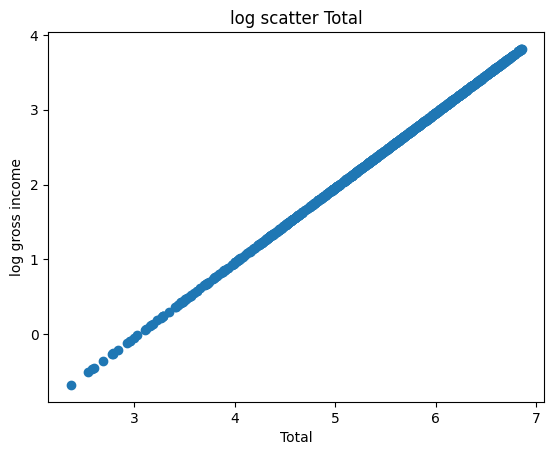

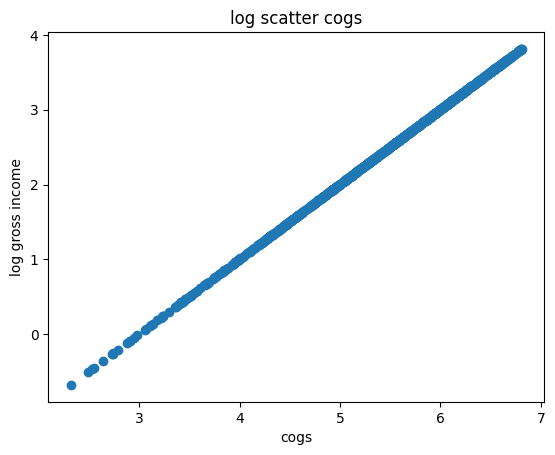

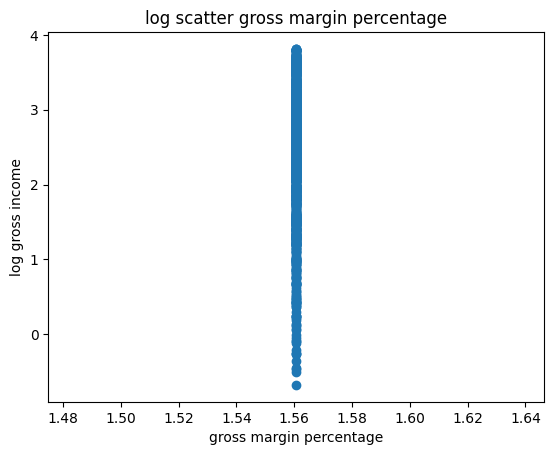

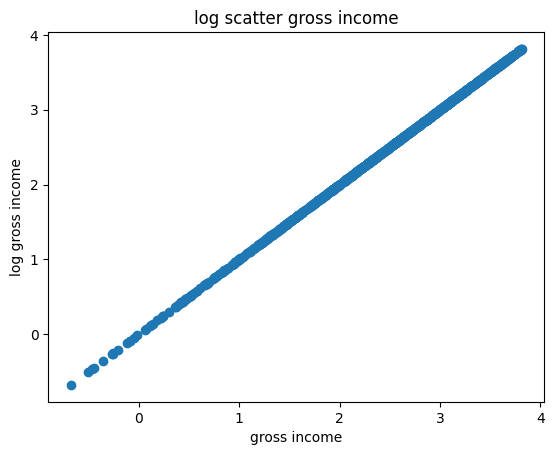

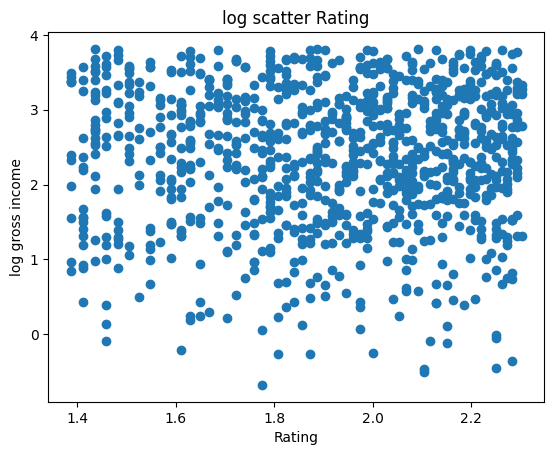

In [56]:
for i in num:
  a=np.log(data[i])
  plt.scatter(a,np.log(data['gross income']))
  plt.xlabel(i)
  plt.ylabel('log gross income')
  plt.title(f"log scatter {i}")
  plt.show()

Data Science

split data to train and test to avoid leakage

1.   List item
2.   List item



In [57]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=0.2,random_state=1)

convert categorical columns to numerical

In [58]:
# Label encoding for ordinal data
# Dummies for nominal data

all categorical columns nominal data so we will use dummies

In [59]:
dummies_col=['Branch','City','Customer type','Gender','Product line','Payment']
train_dummies=pd.get_dummies(train_data,columns=dummies_col)

dummies_col=['Branch','City','Customer type','Gender','Product line','Payment']
test_dummies=pd.get_dummies(test_data,columns=dummies_col)

In [60]:
#standarization for normalization -> Unit price,Quantity,gross margin percentage,Rating
#min-max for skewd -> Tax 5%,Total,cogs

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
normal_columns=['Unit price','Quantity','gross margin percentage','Rating']
scaled_feature=scaler.fit_transform(data[['Unit price','Quantity','gross margin percentage','Rating']])
data_scaled=pd.DataFrame(scaled_feature,columns=normal_columns)
print(data_scaled)

     Unit price  Quantity  gross margin percentage    Rating
0      0.739255  0.529167                      0.0  1.235117
1     -1.520747 -0.160143                      0.0  1.526335
2     -0.339581  0.529167                      0.0  0.244976
3      0.112724  0.873821                      0.0  0.827412
4      1.181289  0.529167                      0.0 -0.978139
..          ...       ...                      ...       ...
985    0.216575 -1.538761                      0.0 -0.628678
986   -0.567065 -1.538761                      0.0 -0.453947
987   -0.890792 -1.538761                      0.0  0.419707
988    0.401833 -1.538761                      0.0 -1.677063
989    1.258512  0.529167                      0.0 -0.220973

[990 rows x 4 columns]


In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler_min = MinMaxScaler()
numerical_features = ['Tax 5%','Total','cogs']
scale_features = scaler_min.fit_transform(data[numerical_features])
data_scale = pd.DataFrame(scale_features, columns=numerical_features)
print(data_scale)


       Tax 5%     Total      cogs
0    0.572913  0.572913  0.572913
1    0.074014  0.074014  0.074014
2    0.351061  0.351061  0.351061
3    0.509136  0.509136  0.509136
4    0.663813  0.663813  0.663813
..        ...       ...       ...
985  0.056748  0.056748  0.056748
986  0.033727  0.033727  0.033727
987  0.024217  0.024217  0.024217
988  0.062191  0.062191  0.062191
989  0.679693  0.679693  0.679693

[990 rows x 3 columns]


split train and test

In [63]:
x_train=train_dummies.drop('gross income',axis=1)
y_train=train_dummies['gross income']

x_test=test_dummies.drop('gross income',axis=1)
y_test=test_dummies['gross income']

In [64]:
x_train.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,Rating,Branch_A,Branch_B,Branch_C,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
821,47.68,2,4.7680,100.1280,95.36,4.761905,4.1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
47,20.01,9,9.0045,189.0945,180.09,4.761905,4.1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
522,37.44,6,11.2320,235.8720,224.64,4.761905,5.9,1,0,0,...,0,0,0,0,0,1,0,0,1,0
860,86.27,1,4.3135,90.5835,86.27,4.761905,7.0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
19,40.30,2,4.0300,84.6300,80.60,4.761905,4.4,0,1,0,...,0,0,0,0,0,1,0,0,0,1


build model

linear regression best model

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 6.354625019230757e-15
Mean Squared Error: 6.329967565904003e-29
Root Mean Squared Error: 7.956109329253843e-15
R-squared: 1.0


In [66]:
print(data['gross income'].min())
print(data['gross income'].max())
print(data['gross income'].mean())

0.5085
45.25
15.045862626262625


In [67]:
coefficients = lr_model.coef_
intercept = lr_model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 1.57165316e-16 -5.41233725e-16  1.94829441e-03  1.60126763e-02
  3.30892752e-02 -7.07347537e-07  6.04975006e-17 -1.37805886e-06
 -2.22658337e-06 -1.65120288e-06 -1.08957952e-06 -1.66496001e-06
 -1.93810402e-06  7.76651800e-07  7.76651800e-07 -9.39292991e-07
 -9.39292991e-07  9.34368591e-07  9.34368590e-07  9.34368590e-07
  9.34368590e-07  9.34368590e-07  9.34368591e-07 -3.64520869e-08
 -3.64520870e-08 -3.64520866e-08]
Intercept: 5.949209180400317e-06


In [68]:
import joblib

# Save the model to a file
joblib.dump(lr_model, 'lr_model.pkl')

['lr_model.pkl']

In [69]:
lr_poly_model = joblib.load('/content/lr_model.pkl')

In [70]:
x_train.iloc[0]

Unit price                              47.680000
Quantity                                 2.000000
Tax 5%                                   4.768000
Total                                  100.128000
cogs                                    95.360000
gross margin percentage                  4.761905
Rating                                   4.100000
Branch_A                                 1.000000
Branch_B                                 0.000000
Branch_C                                 0.000000
City_Mandalay                            0.000000
City_Naypyitaw                           0.000000
City_Yangon                              1.000000
Customer type_Member                     1.000000
Customer type_Normal                     0.000000
Gender_Female                            1.000000
Gender_Male                              0.000000
Product line_Electronic accessories      0.000000
Product line_Fashion accessories         0.000000
Product line_Food and beverages          0.000000


In [71]:
y_test.iloc[0]

4.578

make predict

In [74]:
X_new = np.array([x_train.iloc[0]])
feature_list = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'Rating', 'Branch_A', 'Branch_B', 'Branch_C',
       'City_Mandalay', 'City_Naypyitaw', 'City_Yangon',
       'Customer type_Member', 'Customer type_Normal', 'Gender_Female',
       'Gender_Male', 'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet']
X_new_df = pd.DataFrame(X_new, columns=feature_list)
y_pred = lr_model.predict(X_new_df)
print("Predicted value:", y_pred)

Predicted value: [4.768]


In [ ]:
X_new = np.array([[47.68, 2, 4.768, 100.128,95.36, 4.761905, 4.1, 1, 0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0]])

In [73]:
#Done